This project is about predicting the gdp per capita of 181 countries. I collected the data on my own from several sources which can be found in the apendix.  The goal of this project is to make a prediction via a linear regression model, since I suppose that most of the features have a linear relationship with the label, and it might be interesting to interpret each variable in the statsmodel regression output. 

Here is a further explanation of the features which are used in the dataset:

- population
- land_area = countries total area measured in square kilometers
- net_migrants = imigrants minus migrants
- fert_rate = how many children women have on average
- median_age 
- urban_pop = how much percent of the countries population live in urban areas
- average_temp = average temperature
- peace_rk = ranking on how much 'peace' exists in a country (1 is the worst value)
- corrupt_rk = ranking on how much corruption is in a country (1 is the best value)
- hapiness_score = measurement how happy the citizens of a country are (the higher the score, the better)
- alcohol_consumption = how many liters of alcohol are consumed on average by adults in a year
- life_exp = average life expectancy
- educ_index = countries are ranked on how well the educatinoal system is (1 is the best value, 0 is the worst possible value)
- school_mean = how many years a child goes to school on average
- railway_len = length of railway network
- highway_len = length of highway network

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='whitegrid')

from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv(r'C:\Users\Marco\Documents\jupyter_notebook\gdp_final.csv', sep = ';')

In [3]:
df.head()

,country,gdp,population,land_area,net_migrants,fert_rate,median_age,urban_pop,average_temp,peace_rk,corrupt_rk,hapiness_score,alcohol_consumption,life_exp,educ_index,school_mean,railway_len,highway_len
0,Luxembourg,113196,625978,2590,9741.0,1.5,40.0,88%,8.65,NaN,9.0,7.090,11.9,82.79,0.783,12.0,275.0,152.0
1,Switzerland,83716,8654622,39516,52000.0,1.5,43.0,74%,5.50,10.0,4.0,7.480,10.7,84.25,0.891,13.4,5196.0,1824.0
2,Norway,77975,5421241,365268,28000.0,1.7,40.0,83%,1.50,20.0,7.0,7.554,7.7,82.94,0.916,12.7,3848.0,475.0
3,Ireland,77771,4937786,68890,23604.0,1.8,38.0,63%,9.30,12.0,18.0,7.021,11.9,82.81,0.910,12.3,1931.0,1017.0
4,Qatar,69687,2881053,11610,40000.0,1.9,32.0,96%,27.15,31.0,30.0,6.374,1.5,80.73,0.698,9.8,NaN,NaN


In [4]:
df.isnull().sum()

country                 0
gdp                     0
population              0
land_area               0
net_migrants            1
fert_rate               1
median_age              1
urban_pop               5
average_temp            7
peace_rk               24
corrupt_rk             13
hapiness_score         31
alcohol_consumption     8
life_exp                2
educ_index             12
school_mean            12
railway_len            42
highway_len            86
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              181 non-null    object 
 1   gdp                  181 non-null    int64  
 2   population           181 non-null    int64  
 3   land_area            181 non-null    int64  
 4   net_migrants         180 non-null    float64
 5   fert_rate            180 non-null    float64
 6   median_age           180 non-null    float64
 7   urban_pop            176 non-null    object 
 8   average_temp         174 non-null    float64
 9   peace_rk             157 non-null    float64
 10  corrupt_rk           168 non-null    float64
 11  hapiness_score       150 non-null    float64
 12  alcohol_consumption  173 non-null    float64
 13  life_exp             179 non-null    float64
 14  educ_index           169 non-null    float64
 15  school_mean          169 non-null    flo

In [6]:
df.describe()

,gdp,population,land_area,net_migrants,fert_rate,median_age,average_temp,peace_rk,corrupt_rk,hapiness_score,alcohol_consumption,life_exp,educ_index,school_mean,railway_len,highway_len
count,181.000000,1.810000e+02,1.810000e+02,180.000000,180.000000,180.000000,174.000000,157.000000,168.000000,150.000000,173.000000,179.000000,169.000000,169.000000,139.000000,95.000000
mean,14337.762431,4.302407e+07,7.142439e+05,-19.855556,2.744444,30.183333,18.422989,81.452229,89.273810,5.418727,6.200000,73.224972,0.644828,8.468639,11379.820863,5222.031579
std,19733.250649,1.526950e+08,1.894468e+06,130322.050610,1.300633,9.173361,8.111680,47.654936,52.042901,1.127415,4.245202,7.409557,0.178235,3.169689,33215.436533,18673.873084
min,275.000000,3.393100e+04,6.000000e+01,-653249.000000,1.100000,15.000000,0.700000,1.000000,1.000000,2.853000,0.100000,54.360000,0.206000,1.400000,1.600000,10.000000
25%,1905.000000,3.278290e+06,3.036000e+04,-14737.250000,1.700000,22.000000,10.550000,40.000000,44.000000,4.537500,2.300000,67.840000,0.500000,6.100000,671.000000,254.000000
50%,5506.000000,1.009926e+07,1.553600e+05,-1449.500000,2.300000,30.000000,21.600000,81.000000,88.000000,5.405500,6.200000,74.590000,0.672000,8.900000,2020.000000,1053.000000
75%,17791.000000,3.125544e+07,5.691400e+05,11460.250000,3.625000,38.000000,25.300000,123.000000,131.750000,6.196500,9.300000,78.520000,0.786000,11.300000,5467.500000,2239.500000
max,113196.000000,1.439324e+09,1.637687e+07,954806.000000,7.000000,48.000000,28.250000,163.000000,180.000000,7.769000,17.600000,85.290000,0.939000,13.400000,225625.000000,149600.000000


It seems like the gdp-per-capita is log normally 
distributed.

## Feature Engineering

I will create a few new columns as I think that for some variables it is important that they are put in respective to the size or population of the country.


Furthermore I will add a categorical column of the continent in which each country is located. I belive this variable will be very important for the regression models and it will be also interesting to see in the EDA how the continents differ from each other.

In [7]:
df['pop_km'] = df['population'] / df['land_area']

df['highway_km'] = df['highway_len'] / df['land_area']

df['railway_km'] = df['railway_len'] / df['land_area']

df['migrant_pop'] = df['net_migrants'] / df['population']

In [8]:
europe = ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina',
'Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Finland','France','Georgia','Germany',
'Greece','Hungary','Iceland','Ireland','Italy','Kazakhstan','Kosovo','Latvia','Liechtenstein','Lithuania',
'Luxembourg','Malta','Moldova','Monaco','Montenegro','Netherlands','North Macedonia','Norway','Poland','Portugal',
'Romania','Russia','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Turkey','Ukraine','United Kingdom'
]

df['continent'] = ''

df.loc[df.country.isin(europe), 'continent'] = 'europe'

asia = ['Afghanistan','Armenia','Azerbaijan','Bahrain','Bangladesh','Bhutan','Brunei','Cambodia',
'China','Cyprus','Georgia','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan',
'Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Myanmar','Nepal','North Korea',
'Oman','Pakistan','Palestine','Philippines','Qatar','Russia','Saudi Arabia','Singapore','South Korea',
'Sri Lanka','Syria','Taiwan','Tajikistan','Thailand','Timor-Leste','Turkey','Turkmenistan','United Arab Emirates',
'Uzbekistan','Vietnam','Yemen']

df.loc[df.country.isin(asia), 'continent'] = 'asia'

africa = ['Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi','Cabo Verde','Cameroon',
'Central African Republic','Chad','Comoros','Democratic Republic of the Congo','Republic of the Congo','Ivory Coast',
'Djibouti','Egypt','Equatorial Guinea','Eritrea','Swaziland','Ethiopia','Gabon','Gambia','Ghana',
'Guinea','Guinea-Bissau','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco',
'Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles',
'Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Tanzania','Togo','Tunisia','Uganda',
'Zambia','Zimbabwe']

df.loc[df.country.isin(africa), 'continent'] = 'africa'

north_america = ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba',
'Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica',
'Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines',
'Trinidad and Tobago','United States of America']

df.loc[df.country.isin(north_america), 'continent'] = 'north america'

south_america = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay',
                 'Peru','Suriname','Uruguay','Venezuela']

df.loc[df.country.isin(south_america), 'continent'] = 'south america'

oceania = ['Australia','Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand',
'Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu']

df.loc[df.country.isin(oceania), 'continent'] = 'oceania'

## EDA

It seems like the gdp-per-capita is log-normal-distributed. Later on this will be important for the regression-models, when I have decide whether y should be log-transformed.

In [9]:
gdp_dist = df['gdp'].values
log_gdp = np.log(df['gdp'])

trace0 = go.Histogram(x = gdp_dist, histnorm = 'probability', marker = dict(color = '#335c67'))
                     
trace1 = go.Histogram(x = log_gdp, histnorm = 'probability', marker = dict(color = '#9e2a2b'))
                     
fig = tools.make_subplots(rows = 2, cols = 1, subplot_titles = ('GDP / Capita Distribution', 'GDP / Capita Log Distribution'),
                         print_grid = False)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)

fig['layout'].update(showlegend = False, bargap = 0.05)
iplot(fig)

C:\Users\Marco\anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



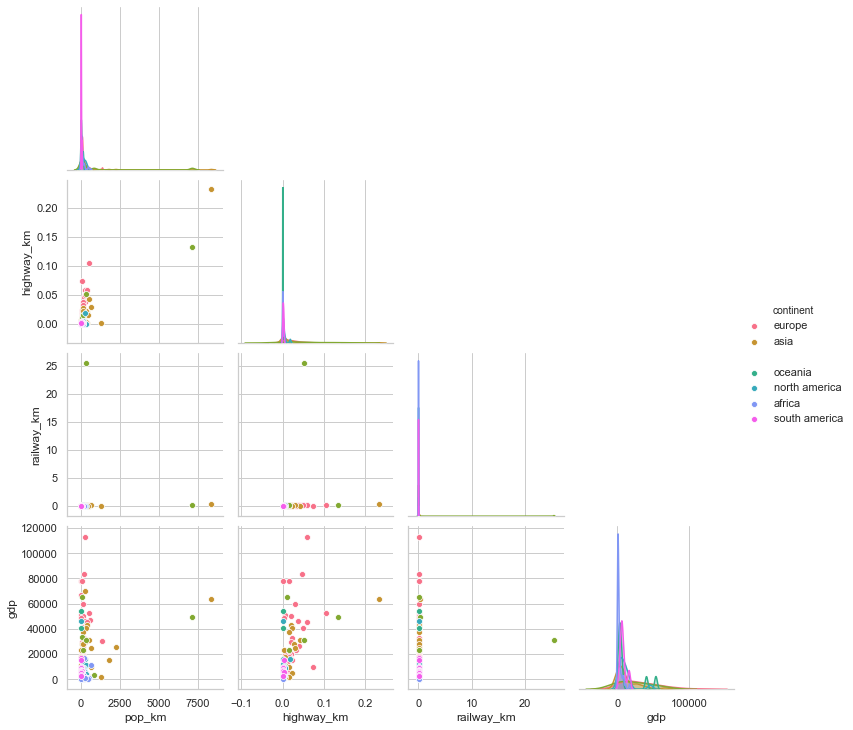

In [10]:
df_exp = df[['pop_km', 'highway_km', 'railway_km', 'gdp', 'continent']]

sns.pairplot(df_exp, hue = 'continent', palette = 'husl', corner = True)

In [11]:
corr = df_exp.corr()

hm = go.Heatmap(z = corr.values, x = corr.index.values.tolist(), y = corr.index.values.tolist())

data = [hm]

layout = go.Layout(title = 'Correlation Heatmap')
fig = dict(data = data, layout = layout)
iplot(fig)

In [12]:
df['urban_pop'] = df['urban_pop'].astype('string')
df.urban_pop = df.urban_pop.str.rstrip('%')

In [13]:
df['urban_pop'] = pd.to_numeric(df['urban_pop'], errors = 'coerce')

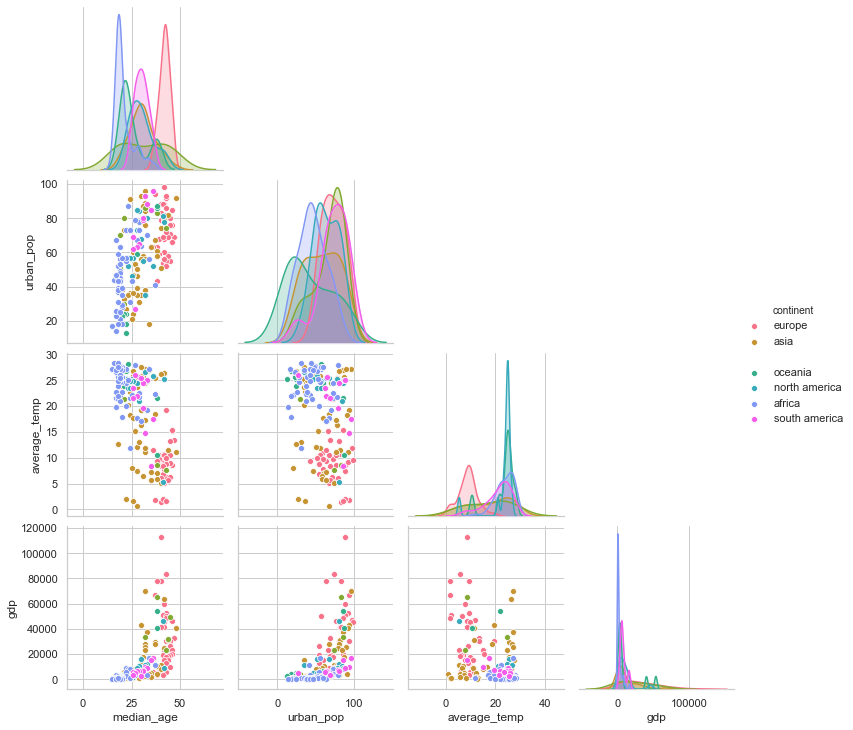

In [14]:
df_exp2 = df[['median_age', 'urban_pop', 'average_temp', 'gdp', 'continent']]

sns.pairplot(df_exp2, hue = 'continent', corner = True, palette = 'husl')

In [15]:
corr2 = df_exp2.corr()

hm2 = go.Heatmap(z = corr2.values, x = corr2.index.values.tolist(), y = corr2.index.values.tolist())

data = [hm2]
layout = go.Layout(title = 'Correlation Heatmap')

fig = dict(data=data, layout=layout)
iplot(fig)

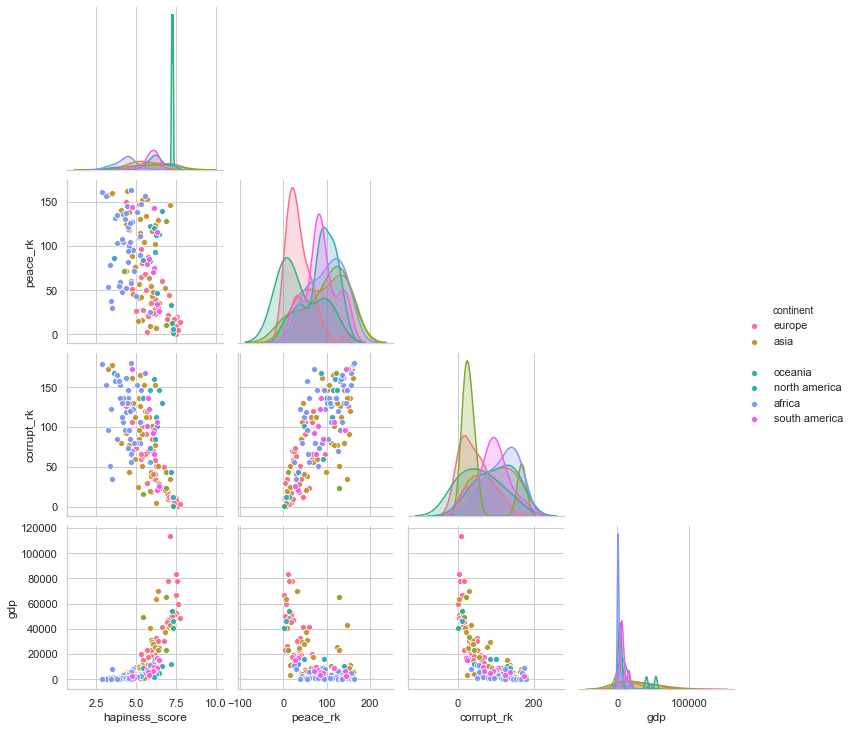

In [16]:
df_exp3 = df[['hapiness_score', 'peace_rk', 'corrupt_rk', 'gdp', 'continent']]

sns.pairplot(df_exp3, hue = 'continent', palette = 'husl', corner = True)

In [17]:
corr3 = df_exp3.corr()

hm3 = go.Heatmap(z = corr3.values, x = corr3.index.values.tolist(), y = corr3.index.values.tolist())

data = hm3
layout = go.Layout(title = 'Correlation Heatmap')

fig = dict(data = data, layout = layout)
iplot(fig)

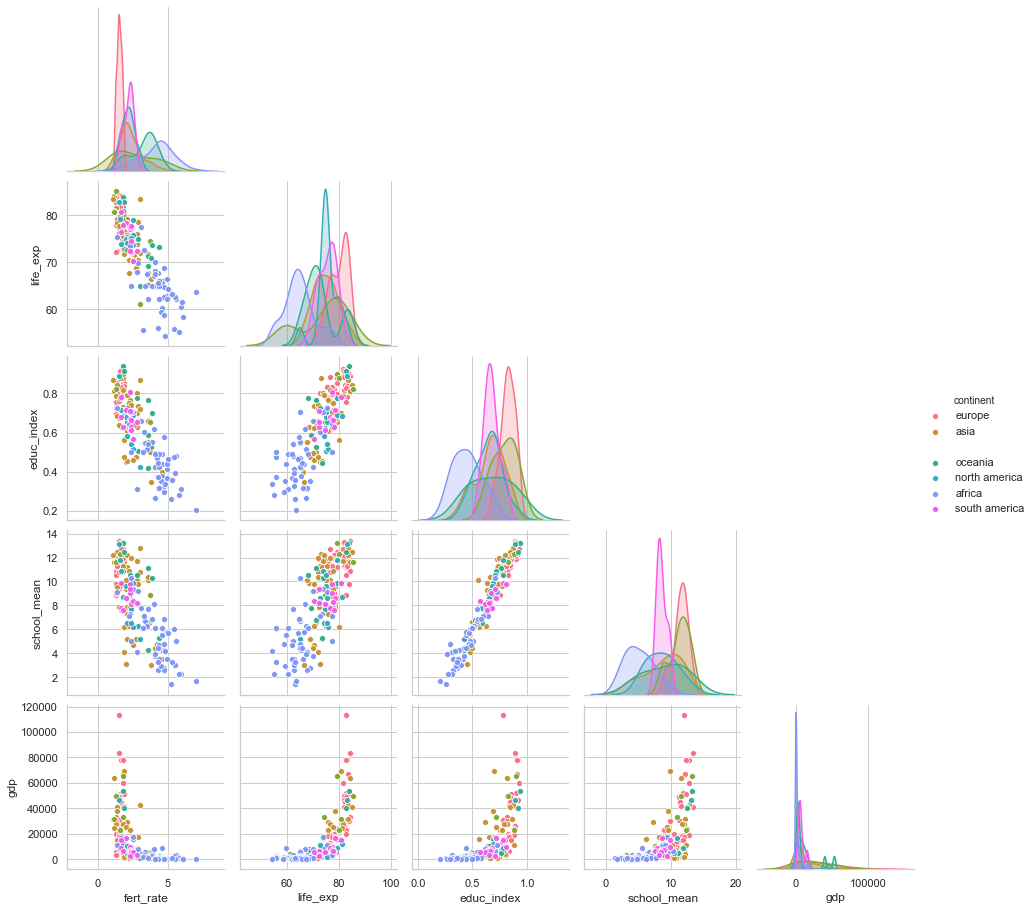

In [18]:
df_exp4 = df[['fert_rate', 'life_exp', 'educ_index', 'school_mean', 'gdp', 'continent']]

sns.pairplot(df_exp4, hue = 'continent', palette = 'husl', corner = True)

In [19]:
corr4 = df_exp4.corr()

hm4 = go.Heatmap(z = corr4.values, x = corr4.index.values.tolist(), y = corr4.index.values.tolist())

data = hm4
layout = go.Layout(title = 'Correlation Heatmap')
fig = dict(data = data, layout = layout)
iplot(fig)

In [20]:
# df.corr(method = 'pearson')

In [21]:
european = df['gdp'].loc[df['continent'] == 'europe'].values
asian = df['gdp'].loc[df['continent'] == 'asia'].values
african = df['gdp'].loc[df['continent'] == 'africa'].values
s_american = df['gdp'].loc[df['continent'] == 'south america'].values
n_american = df['gdp'].loc[df['continent'] == 'north america'].values
oceanian = df['gdp'].loc[df['continent'] == 'oceania'].values

trace0 = go.Box(y = european, name = 'Europe', boxmean = True)
trace1 = go.Box(y = asian, name = 'Asia', boxmean = True)
trace2 = go.Box(y = oceanian, name = 'Oceania', boxmean = True)
trace3 = go.Box(y = n_american, name = 'N. America', boxmean = True)
trace4 = go.Box(y = s_american, name = 'S. America', boxmean = True)
trace5 = go.Box(y = african, name = 'Africa', boxmean = True)




data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(title = 'GDP per Capita by Continent',
                  xaxis = dict(title = 'Continent'),
                  yaxis = dict(title = 'GDP per Capita'))

fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [22]:
european = df['life_exp'].loc[df['continent'] == 'europe'].values
asian = df['life_exp'].loc[df['continent'] == 'asia'].values
african = df['life_exp'].loc[df['continent'] == 'africa'].values
s_american = df['life_exp'].loc[df['continent'] == 'south america'].values
n_american = df['life_exp'].loc[df['continent'] == 'north america'].values
oceanian = df['life_exp'].loc[df['continent'] == 'oceania'].values

trace0 = go.Box(y = european, name = 'Europe', boxmean = True)
trace1 = go.Box(y = asian, name = 'Asia', boxmean = True)
trace2 = go.Box(y = oceanian, name = 'Oceania', boxmean = True)
trace3 = go.Box(y = n_american, name = 'N. America', boxmean = True)
trace4 = go.Box(y = s_american, name = 'S. America', boxmean = True)
trace5 = go.Box(y = african, name = 'Africa', boxmean = True)

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(title = 'Life Expectancy by Continent',
                  xaxis = dict(title = 'Continent'),
                  yaxis = dict(title = 'Life Expectancy in years'))

fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [23]:
european = df['fert_rate'].loc[df['continent'] == 'europe'].values
asian = df['fert_rate'].loc[df['continent'] == 'asia'].values
african = df['fert_rate'].loc[df['continent'] == 'africa'].values
s_american = df['fert_rate'].loc[df['continent'] == 'south america'].values
n_american = df['fert_rate'].loc[df['continent'] == 'north america'].values
oceanian = df['fert_rate'].loc[df['continent'] == 'oceania'].values

trace0 = go.Box(y = european, name = 'Europe', boxmean = True)
trace1 = go.Box(y = asian, name = 'Asia', boxmean = True)
trace2 = go.Box(y = oceanian, name = 'Oceania', boxmean = True)
trace3 = go.Box(y = n_american, name = 'N. America', boxmean = True)
trace4 = go.Box(y = s_american, name = 'S. America', boxmean = True)
trace5 = go.Box(y = african, name = 'Africa', boxmean = True)

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(title = 'Fertility Rate by Continent',
                  xaxis = dict(title = 'Continent'),
                  yaxis = dict(title = 'Fertility Rate'))

fig = go.Figure(data = data, layout = layout)
iplot(fig)

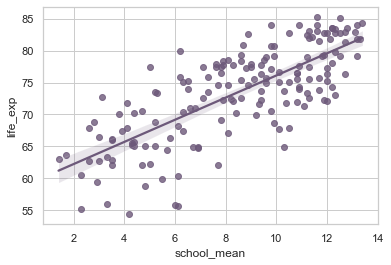

In [24]:
sns.regplot(x = 'school_mean', y = 'life_exp', data = df, color = '#6d597a')

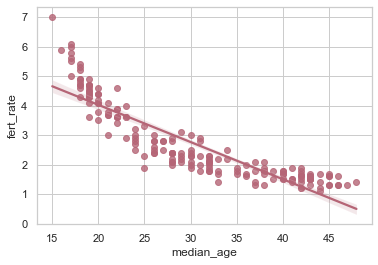

In [25]:
sns.regplot(x = 'median_age', y = 'fert_rate', data=df, color = '#b56576')

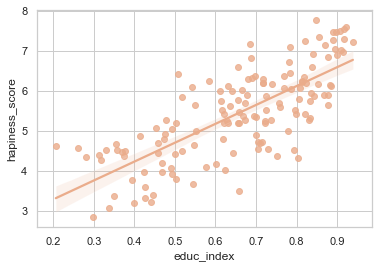

In [26]:
sns.regplot(x = 'educ_index', y = 'hapiness_score', data=df, color = '#eaac8b')

In [27]:
urban_dist = df['urban_pop'].values

trace = go.Histogram(x = urban_dist, histnorm = 'probability', marker = dict(color = '#003049'))

layout = go.Layout(title = 'Urban Population Distribution', bargap = 0.05,
                  xaxis = dict(title = 'Percentage of citizens living in urban areas'))
fig = go.Figure(data = trace, layout = layout)
               
iplot(fig)

In [28]:
df.loc[df['urban_pop'] <= 33, 'urbanization_cat'] = 'not urbanized'
df.loc[(df['urban_pop'] > 33) & (df['urban_pop'] <= 66), 'urbanization_cat'] = 'urbanized'
df.loc[df['urban_pop'] > 66, 'urbanization_cat'] = 'very urbanized'

To show the influence of a countries urbanization in a better way I created a categorical feature for this variable. There is no offial definition when a country is urbanized or not, therefore I just split the variable into three different categories that are equally big. 

Text(0.5, 1.0, 'Relationship betwen Urbanization/Continent and GDP')

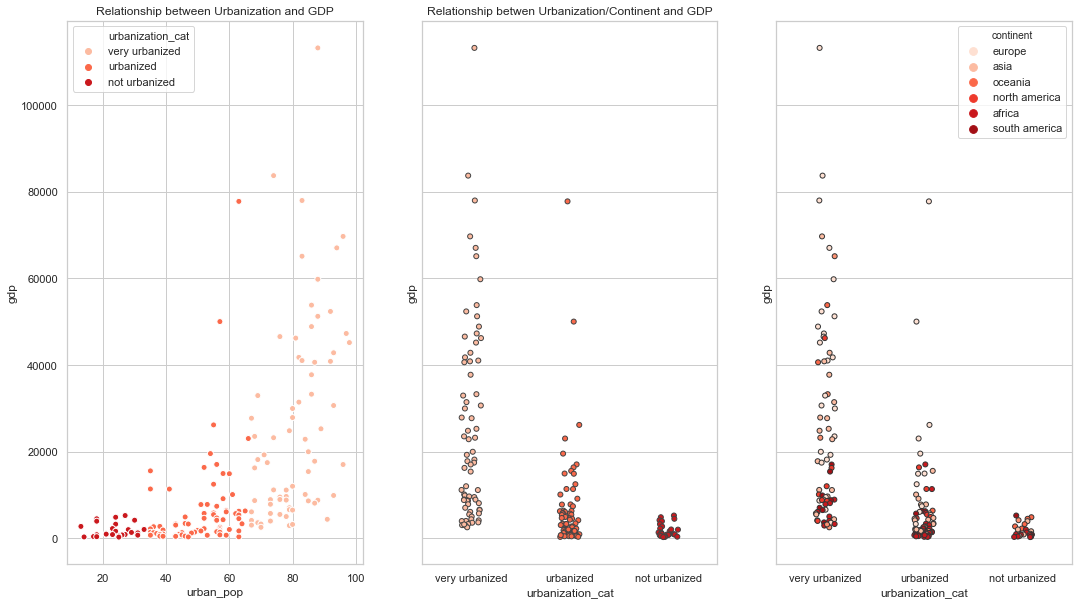

In [29]:
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (18,10), sharey = True)

sns.scatterplot(x = 'urban_pop', y = 'gdp', hue = 'urbanization_cat', data = df, palette = 'Reds', linewidth = 1, ax = ax1)
ax2.set_title('Relationship between Urbanization and GDP')

sns.stripplot(x = 'urbanization_cat', y = 'gdp', data = df, ax = ax2, linewidth = 1, palette = 'Reds')
ax1.set_title('Relationship between Urbanization and GDP')

sns.stripplot(x = 'urbanization_cat', y = 'gdp', data = df, ax = ax3, hue = 'continent', linewidth = 1, palette = 'Reds')
ax2.set_title('Relationship betwen Urbanization/Continent and GDP')

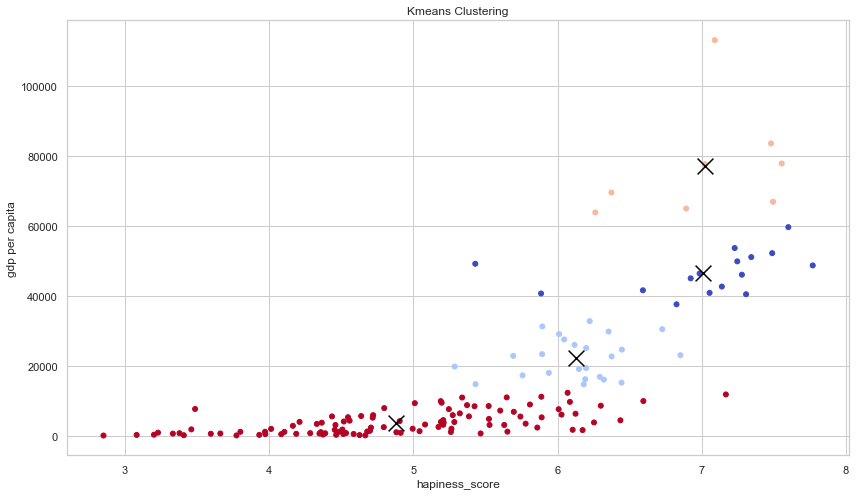

In [30]:
from sklearn.cluster import KMeans

X = df[['hapiness_score', 'gdp']]
X.dropna(inplace = True)

model = KMeans()
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

plt.figure(figsize=(14,8))
plt.scatter(X.values[:,0], X.values[:,1], c = kmeans.labels_, cmap = 'coolwarm', s = 25)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black', marker = 'x', s = 250)
plt.title('Kmeans Clustering')
plt.xlabel('hapiness_score')
plt.ylabel('gdp per capita')
plt.show()

## Data Cleaning / Preprocessing

In the following I will create two dataframes. One for the PCA where the data is scaled, and one for the Machine Learning Models with dummy variables for the continent column.


The dataset is very small with only 180 observations, therefore it is important to keep as many rows as possible, even though they contain NaN values. I will remove all rows that countain more than 4 missing values and I'll impute the rest of the missing values with the median. I decided to go for the median, since there are some outliers and the data is skewed. Therefore it is more likely that the median is closer to the actual value than the mean. 

In [31]:
df.isnull().sum()

country                 0
gdp                     0
population              0
land_area               0
net_migrants            1
fert_rate               1
median_age              1
urban_pop               5
average_temp            7
peace_rk               24
corrupt_rk             13
hapiness_score         31
alcohol_consumption     8
life_exp                2
educ_index             12
school_mean            12
railway_len            42
highway_len            86
pop_km                  0
highway_km             86
railway_km             42
migrant_pop             1
continent               0
urbanization_cat        5
dtype: int64

In [32]:
df1 = df.drop(['urbanization_cat', 'highway_km', 'railway_km', 'railway_len', 'highway_len',
              'population', 'net_migrants', 'land_area'], axis = 1)

df1.dropna(thresh = 10, inplace = True)

In [33]:
df1.continent.replace('', np.nan, inplace = True)
df1.dropna(subset = ['continent'] , inplace = True)
df1.set_index('country', inplace = True)

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
])

df1_num = df1[['fert_rate', 'median_age', 'urban_pop', 'average_temp', 'peace_rk', 'hapiness_score',
             'alcohol_consumption', 'life_exp', 'educ_index', 'school_mean', 'pop_km', 'migrant_pop', 'gdp']]

num_attribs = list(df1_num)
df1_num_tr = pipeline.fit_transform(df1_num)

df_pca = pd.DataFrame(df1_num_tr, index = df1.index, columns = df1_num.columns)

In [35]:
pipeline2 = Pipeline([
    ('imputer2', SimpleImputer(strategy = 'median'))
])

df2_num_tr = pipeline2.fit_transform(df1_num)
df2 = pd.DataFrame(df2_num_tr, index = df1.index, columns = df1_num.columns)

In [36]:
df2_dum = pd.get_dummies(df1['continent'], prefix = 'continent').drop('continent_europe', axis = 1)
df3 = df2.join(df2_dum, how = 'outer')

## PCA

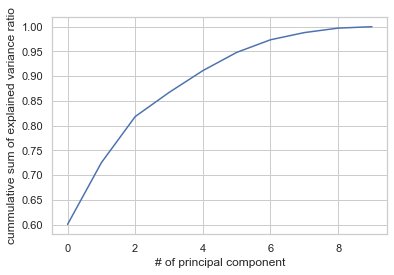

In [37]:
from sklearn.decomposition import PCA

X_pca = df_pca.drop(['average_temp', 'alcohol_consumption', 'peace_rk'], axis = 1)

pca = PCA().fit(X_pca)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of principal component')
plt.ylabel('cummulative sum of explained variance ratio')
plt.show()

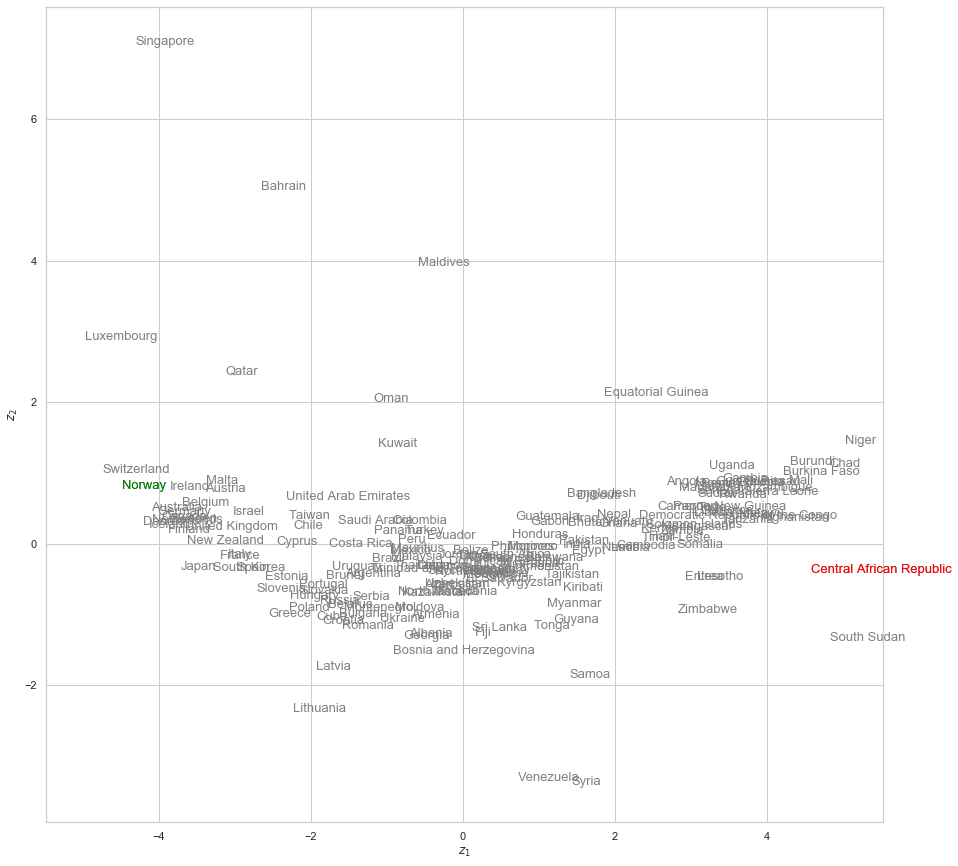

In [38]:
Z = pca.transform(X_pca)

plt.figure(figsize=(15,15))
plt.scatter(Z[:,0], Z[:,1], alpha = 0)
plt.xlabel(r'$z_1$')
plt.ylabel(r'$z_2$')

for i in range(0, 171):
    plt.annotate(df_pca.index[i], (Z[i,0], Z[i,1]), color = 'gray', fontsize=13)
    
plt.annotate('Norway',
            (Z[df_pca.index == 'Norway',0],
            Z[df_pca.index == 'Norway', 1]), color = 'green', fontsize=13) 
             
plt.annotate('Central African Republic',
            (Z[df_pca.index == 'Central African Republic',0],
            Z[df_pca.index == 'Central African Republic', 1]), color = 'red', fontsize=13) 
    
plt.show()

In the PCA I highlighted two countries: Norway and the Central African Republic, since in most of the used rankings, Norway was the first place and the Central African Republic the last.

## Regression Models

##### Simple Linear Regression

In the following I will log-transform the y-variable which gives us a log-level-model. In the EDA one could see that the gdp-per-capita is log-normal distributed. In such cases regression-models are often more accurate when the dependent variable is log-transformed.

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     315.9
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           1.59e-40
Time:                        20:04:34   Log-Likelihood:                -216.92
No. Observations:                 171   AIC:                             437.8
Df Residuals:                     169   BIC:                             444.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.4557      0.351      6.

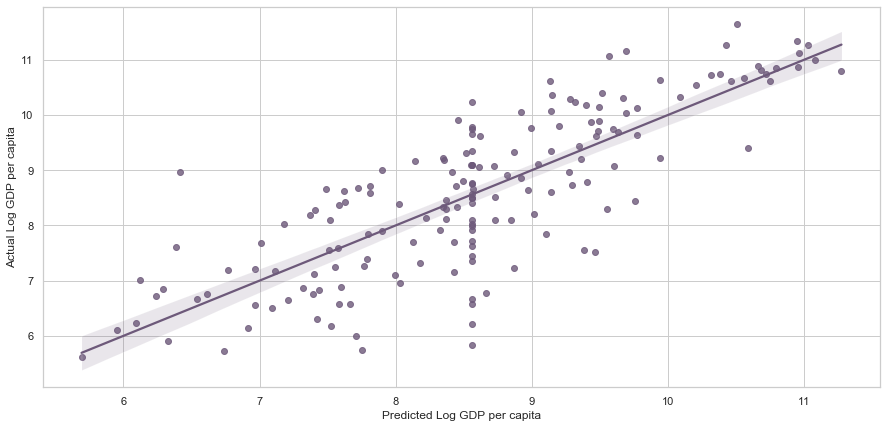

In [39]:
import statsmodels.api as sm

y = np.log(df3['gdp'])
X1 = df3['hapiness_score']
X1 = sm.add_constant(X1)
model1 = sm.OLS(y, X1).fit()
model1_pred = model1.predict(X1)
print(model1.summary())

plt.figure(figsize=(15,7))
sns.regplot(model1_pred, y, color = '#6d597a')
plt.xlabel('Predicted Log GDP per capita')
plt.ylabel('Actual Log GDP per capita')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     183.6
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           8.70e-29
Time:                        20:04:35   Log-Likelihood:                -244.16
No. Observations:                 171   AIC:                             492.3
Df Residuals:                     169   BIC:                             498.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7210      0.225     25.390      0.0

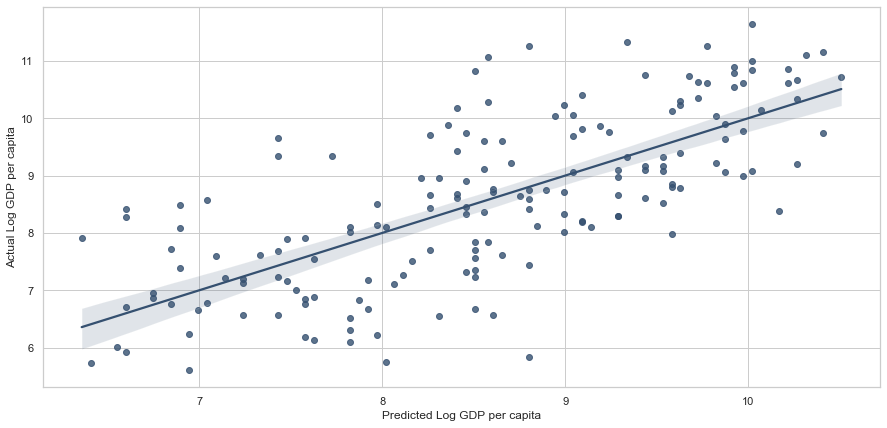

In [40]:
y = np.log(df3['gdp'])
X2 = df3['urban_pop']
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()
model2_pred = model2.predict(X2)
print(model2.summary())

plt.figure(figsize=(15,7))
sns.regplot(model2_pred, y, color = '#355070')
plt.xlabel('Predicted Log GDP per capita')
plt.ylabel('Actual Log GDP per capita')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     247.9
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           5.82e-35
Time:                        20:04:35   Log-Likelihood:                -229.84
No. Observations:                 171   AIC:                             463.7
Df Residuals:                     169   BIC:                             470.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9719      0.167     65.527      0.0

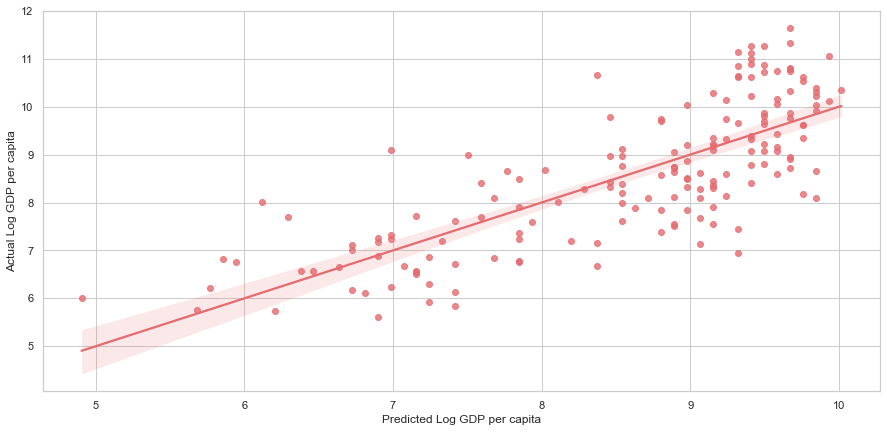

In [41]:
y = np.log(df3['gdp'])
X3 = df3['fert_rate']
X3 = sm.add_constant(X3)
model3 = sm.OLS(y, X3).fit()
model3_pred = model3.predict(X3)
print(model3.summary())

plt.figure(figsize=(15,7))
sns.regplot(model3_pred, y, color = '#e56b6f')
plt.xlabel('Predicted Log GDP per capita')
plt.ylabel('Actual Log GDP per capita')
plt.show()

##### Multiple Linear Regression

In [42]:
X4 = df3.drop('gdp', axis = 1)
X4 = sm.add_constant(X4)
model4 = sm.OLS(y, X4).fit()
model4_pred = model4.predict(X4)
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     80.20
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           4.07e-67
Time:                        20:04:36   Log-Likelihood:                -110.93
No. Observations:                 171   AIC:                             257.9
Df Residuals:                     153   BIC:                             314.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

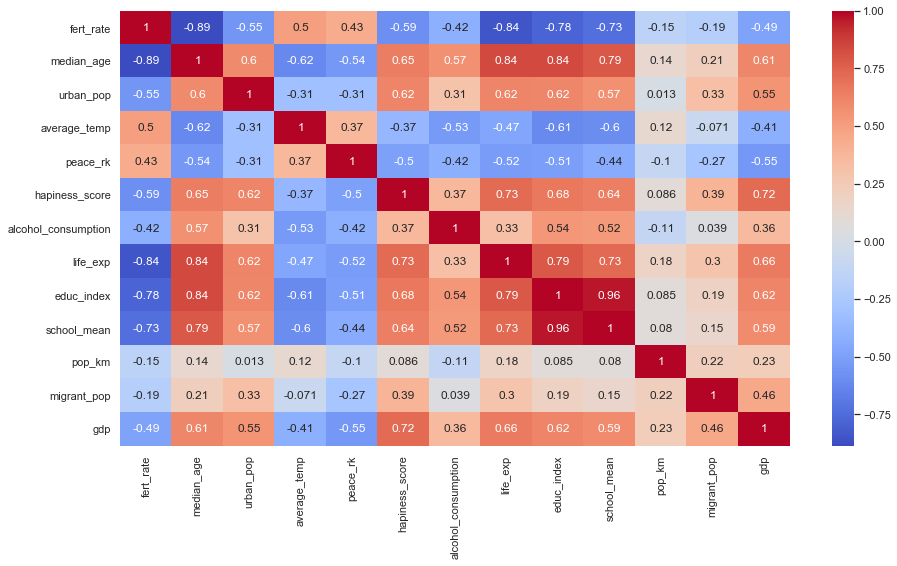

In [43]:
df3_corr = df3.drop(['continent_africa', 'continent_asia', 'continent_north america', 'continent_south america', 'continent_oceania'], axis = 1)

plt.figure(figsize=(15,8))
sns.heatmap(df3_corr.corr(), annot = True, cmap = 'coolwarm')

The Problem is that there are some highly correlated variables in the dataset. Due to Multicollinearity the estimators can become inaccurate and volatile. A solution for that could be the Ridge- or Lasso Regression where big estimators are penalized. I will try another Multiple Linear Regression where I'll drop some of the correlated variables. 

In the Regression Output it is also noticable that the p-values for some of the estimators are way above 0.05 what would mean that the variables don't have a significant influence on y. For example the estimator of 'life_exp' has a p-value of 0.18, but in the simple linear regression we saw that this variable has without a doubt a significant influnce on the gdp per capita.

In [44]:
X5 = df3.drop(['gdp', 'educ_index', 'median_age', 'life_exp', 'fert_rate'], axis = 1)
X5 = sm.add_constant(X5)
model5 = sm.OLS(y, X5).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     79.52
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           4.49e-62
Time:                        20:04:36   Log-Likelihood:                -133.80
No. Observations:                 171   AIC:                             295.6
Df Residuals:                     157   BIC:                             339.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

As we can see now most of the estimators have low p-values and the r-squared of the regression decreased only a little bit. It seems like this regression model can be interpreted in a better way.

Here is the interpretation of the model:

- 86.8 percent of the total variability can be explained by the model


- If the **urban population** increased by 1%, the gdp per capita would **increase** c.p. on average by **1.8%**


- If the **average temperature** increases by 1 degree celsius, the gdp per capita would **increase** c.p. on average by **2.6%**


- If a country moves up one position on the **peace ranking**, the gdp per capita would **decrease** c.p. on average by **0.5%** (Note: The lower the ranking, the more 'peace' exists in a country)


- If the country moves up one position on the **alcohol ranking**, gdp per capita would **increase** c.p. on average by **2.8%**


- If the country's **school mean** increases by one year, the gdp per capita would **increase** c.p. on average by **12.5%**


- If the **population per square kilometer** icreases by one, the gdp per capita would **increase** c.p. on average by **0.01%**


- If the **migrant population per capita** increases by one, gdp per capita would **increase** c.p. on average by **31.5%**


## Machine Learning Models

#### Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size = 0.25, random_state=77)

reg1 = LinearRegression().fit(X_train, y_train)
y1_pred = reg1.predict(X_test)
reg1_mse = mean_squared_error(y_test, y1_pred)
reg1_rmse = np.sqrt(reg1_mse)
print('RMSE (Model 1):', reg1_rmse.round(4))

RMSE (Model 1): 0.591


In [46]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X5, y, test_size = 0.25, random_state=77)
reg2 = LinearRegression().fit(X2_train, y_train)
y2_pred = reg2.predict(X2_test)
reg2_mse = mean_squared_error(y_test, y2_pred)
reg2_rmse = np.sqrt(reg2_mse)
print('RMSE (Model 2):', reg2_rmse.round(4))

RMSE (Model 2): 0.6496


#### Ridge Regression

In [47]:
from sklearn.linear_model import Ridge

ridge1 = Ridge().fit(X_train, y_train)
ridge1_pred = ridge1.predict(X_test)
ridge1_mse = mean_squared_error(y_test, ridge1_pred)
ridge1_rmse = np.sqrt(ridge1_mse)
print('RMSE (Ridge Model 1): ', ridge1_rmse.round(4))

RMSE (Ridge Model 1):  0.5207


In [48]:
from sklearn.model_selection import GridSearchCV

grid = {'alpha': np.arange(0.1,20, step = 0.1)}

ridge2 = GridSearchCV(estimator = Ridge(), param_grid = grid).fit(X_train, y_train)
ridge2.best_params_

{'alpha': 6.4}

In [49]:
ridge2_pred = ridge2.predict(X_test)
ridge2_mse = mean_squared_error(ridge2_pred, y_test)
ridge2_rmse = np.sqrt(ridge2_mse)
print('RMSE (Ridge Model 1):', ridge2_rmse.round(4))

RMSE (Ridge Model 1): 0.5203


In [50]:
ridge3 = GridSearchCV(estimator = Ridge(), param_grid = grid).fit(X2_train, y2_train)
ridge3.best_params_

{'alpha': 0.8}

In [51]:
ridge3_pred = ridge3.predict(X2_test)
ridge3_mse = mean_squared_error(ridge3_pred, y2_test)
ridge3_rmse = np.sqrt(ridge3_mse)
print('RMSE (Ridge Model 2):', ridge3_rmse.round(4))

RMSE (Ridge Model 2): 0.6332


We can see that the Ridge Regression improved the first model a lot more than the second model. This is due to the fact that the first model contains a lot of correlated variables. Ridge Regression was created for exact this reason, to avoid multicollinearity.  

#### Random Forest Regression

In [52]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state = 77).fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
rfr_mse = mean_squared_error(rfr_pred, y_test)
rfr_rmse = np.sqrt(rfr_mse)
print('RMSE (Random Forest Regressor Model 1):', rfr_rmse)

RMSE (Random Forest Regressor Model 1): 0.6807569605353303


In [53]:
grid2 = {'n_estimators': [200, 400, 600, 800, 1000],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10]
        }

rfr2 = GridSearchCV(estimator = RandomForestRegressor(), param_grid = grid2).fit(X_train, y_train)
rfr2.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}

In [54]:
rfr2_pred = rfr2.predict(X_test)
rfr2_mse = mean_squared_error(rfr2_pred, y_test)
rfr2_rmse = np.sqrt(rfr2_mse)
print('RMSE (Random Forest Regressor Model 1):', rfr2_rmse)

RMSE (Random Forest Regressor Model 1): 0.6633170841379858


In [55]:
rfr3 = RandomForestRegressor(random_state = 77).fit(X2_train, y2_train)
rfr3_pred = rfr3.predict(X2_test)
rfr3_mse = mean_squared_error(rfr3_pred, y2_test)
rfr3_rmse = np.sqrt(rfr3_mse)
print('RMSE (Random Forest Regressor Model 2):', rfr3_rmse)

RMSE (Random Forest Regressor Model 2): 0.7251340533808663


In [56]:
rfr4 = GridSearchCV(estimator = RandomForestRegressor(), param_grid = grid2).fit(X2_train, y2_train)
rfr4.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}

In [57]:
rfr4_pred = rfr4.predict(X2_test)
rfr4_mse = mean_squared_error(rfr4_pred, y2_test)
rfr4_rmse = np.sqrt(rfr4_mse)
print('RMSE (Random Forest Regressor Model 2):', rfr4_rmse)

RMSE (Random Forest Regressor Model 2): 0.7153347614814213


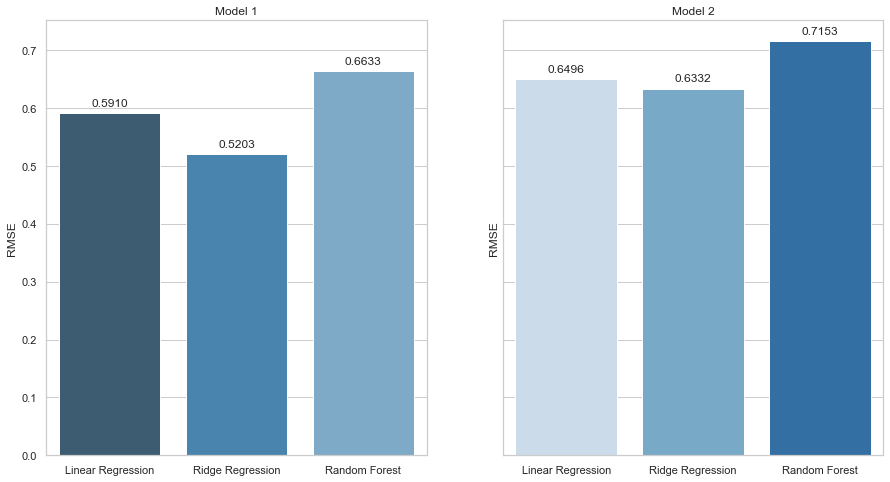

In [58]:
d = {'Model': ['Linear Regression', 'Ridge Regression', 'Random Forest'],
    'RMSE': [reg1_rmse, ridge2_rmse, rfr2_rmse]}

d2 = {'Model': ['Linear Regression', 'Ridge Regression', 'Random Forest'],
    'RMSE': [reg2_rmse, ridge3_rmse, rfr4_rmse]}


df_res = pd.DataFrame(data = d)
df_res2 = pd.DataFrame(data = d2)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,8), sharey = True)

g = sns.barplot(x = 'Model', y = 'RMSE', data = df_res, ax = ax1, palette = 'Blues_d')
g.set(title = 'Model 1', xlabel = '')

for p in g.patches:
    g.annotate(format(p.get_height(), '.4f'), (p.get_x() + p.get_width() / 2., p.get_height() ),
              ha = 'center', va = 'center', xytext=(0,10), textcoords = 'offset points')

h = sns.barplot(x = 'Model', y = 'RMSE', data = df_res2, ax = ax2, palette = 'Blues')
h.set(title = 'Model 2', xlabel = '')

for p in h.patches:
    h.annotate(format(p.get_height(), '.4f'), (p.get_x() + p.get_width() / 2., p.get_height() ),
              ha = 'center', va = 'center', xytext=(0,10), textcoords = 'offset points')

As we can see the Ridge Regression on the first Model with 17 variables performs the best. I was actually surprised how accurate the machine learning models predict the GDP per capita, as I thought that there are many more factors that cannot be measured in numbers which have a big influence on the economic strength of a nation. But even the second regression model with only 9 variables and a r-squared of 0.86 did surprisingly well and tells us that with very few variables we can predict the gdp per capita very well.

